In [1]:
import sys
sys.path.append('../')
import os
DATABASE = os.environ['DATABASE_URL'].split('sqlite:///')[1]

import pandas as pd
from helpers import sqlite_to_df
from matplotlib import pyplot as plt

In [2]:
# Regular Imports
from datetime import datetime
import pandas as pd
import numpy as np
import warnings

# Matplotlib imports 
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from IPython.display import set_matplotlib_formats
import matplotlib

# Formatters for matplotlib
from matplotlib.ticker import StrMethodFormatter



# Options
pd.set_option('display.max_rows',200)
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.notebook_repr_html', True)


%matplotlib inline
plt.rcParams['figure.dpi'] = 100
set_matplotlib_formats('pdf', 'png')
matplotlib.rcParams['figure.figsize'] = (4.5,2.7)
matplotlib.rcParams["legend.fontsize"] = 7
matplotlib.rcParams['font.size'] = 7

/var/folders/51/f34q3vy907ggv81__1wckfyc0000gn/T/ipykernel_26886/3107368209.py:26: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('pdf', 'png')


In [3]:
# Formatters and Display Functions
IT_FORMATTER = StrMethodFormatter('{x:,.0f}')

def get_float_formatter(n=1):
    return StrMethodFormatter(f'{{x:.{n}f}}')
FLOAT_FORMATTER = get_float_formatter()

INT_FORMATTER = StrMethodFormatter("{x:,g}")
INT_FORMAT_STRING = '{:,g}'

PERCENT_FORMATTER = StrMethodFormatter("{x:,.0%}")
PERCENT_FORMAT_STRING = '{:,.1%}'

In [4]:
# Get evaluations into a df for analysis

df = sqlite_to_df('SELECT * from evaluations').dropna()

In [5]:
df.head()

,id,rating,d,k,seed,link,FGP,R,FGP3,season,tournament_loss,correct_predictions
0,1_25_-5_N_1200_20_0_2010_100_600_0.79889,1.0,600.0,25,-5.0,N,1200.0,20.0,0.0,2010,0.093811,100.0
1,1_25_-5_N_1200_20_0_2010_500_600_0.41289,1.0,600.0,25,-5.0,N,1200.0,20.0,0.0,2010,0.094474,500.0
2,1_25_-5_N_1200_20_0_2010_1000_600_0.18341,1.0,600.0,25,-5.0,N,1200.0,20.0,0.0,2010,0.094275,1000.0
3,1_25_-5_N_1200_20_0_2011_100_600_0.39056,1.0,600.0,25,-5.0,N,1200.0,20.0,0.0,2011,0.094093,100.0
4,1_25_-5_N_1200_20_0_2011_500_600_0.26802,1.0,600.0,25,-5.0,N,1200.0,20.0,0.0,2011,0.092678,500.0


In [6]:
df.columns

Index(['id', 'rating', 'd', 'k', 'seed', 'link', 'FGP', 'R', 'FGP3', 'season',
       'tournament_loss', 'correct_predictions'],
      dtype='object')

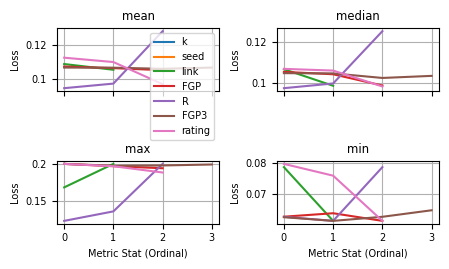

In [7]:
# Subplots
fig, axes = plt.subplots(2,2)
axes = axes.flatten()

# Resize to accomodate more figures
matplotlib.rcParams['figure.figsize'] = (19,15.4)

stats = ['mean', 'median', 'max', 'min']
params = ['k', 'seed', 'link', 'FGP', 'R', 'FGP3', 'rating']

for ix, stat in enumerate(stats):
    ax = axes[ix]
    
    for col in params:
        stats_df = df.groupby(by=[col]).tournament_loss.agg(stats)
        ax.plot(stats_df[stat].sort_index().reset_index(drop=True), label=col)
        
    plt.draw()

    ax.set_title(stat)

    ax.set_xlabel("Metric Stat (Ordinal)")
    ax.set_ylabel("Loss")
    
    ax.xaxis.set_major_formatter(INT_FORMATTER)
    ax.yaxis.set_major_formatter(INT_FORMATTER)

#     # Only show some tick labels
#     xticks = list(ax.get_xticks())
#     xlabels = list(ax.get_xticklabels())
#     n = 5
#     ax.set_xticks(xticks[::n])
#     ax.set_xticklabels(xlabels[::n])
#     ax2.set_xticks(xticks[::n])
#     ax2.set_xticklabels(xlabels[::n])
    
#     ax.tick_params(axis='x', rotation=45)
    
#     # Now plot on secondary axis
#     ax2.plot(df["death_rate"], alpha=0.4, c='g', linestyle='dashed', label='death_rate')
#     ax2.plot(df["recovered_rate"], alpha=0.4, c='r', linestyle='dashed', label='recovered_rate')

    # Show grid on major axis
    ax.grid()
    
#     # Show secondary legend
#     if ix == 1:
#         ax2.legend(loc=0)
    if ix == 0:
        ax.legend(loc=0)
    
    # Get rid of x labels if chart in upper area
    if ix < 2:
        ax.set_xticklabels([])
#         ax2.set_xticklabels([])
        ax.set_xlabel("")
        
#     # Show horizontal line
#     ax2.axhline(y=0.01, c='black', alpha = 0.9)
    
#     # Set axes limits
#     ax2.set_ylim(0,0.05)
    
    # Add spacing between subplots to show axes more clearly
    plt.tight_layout()


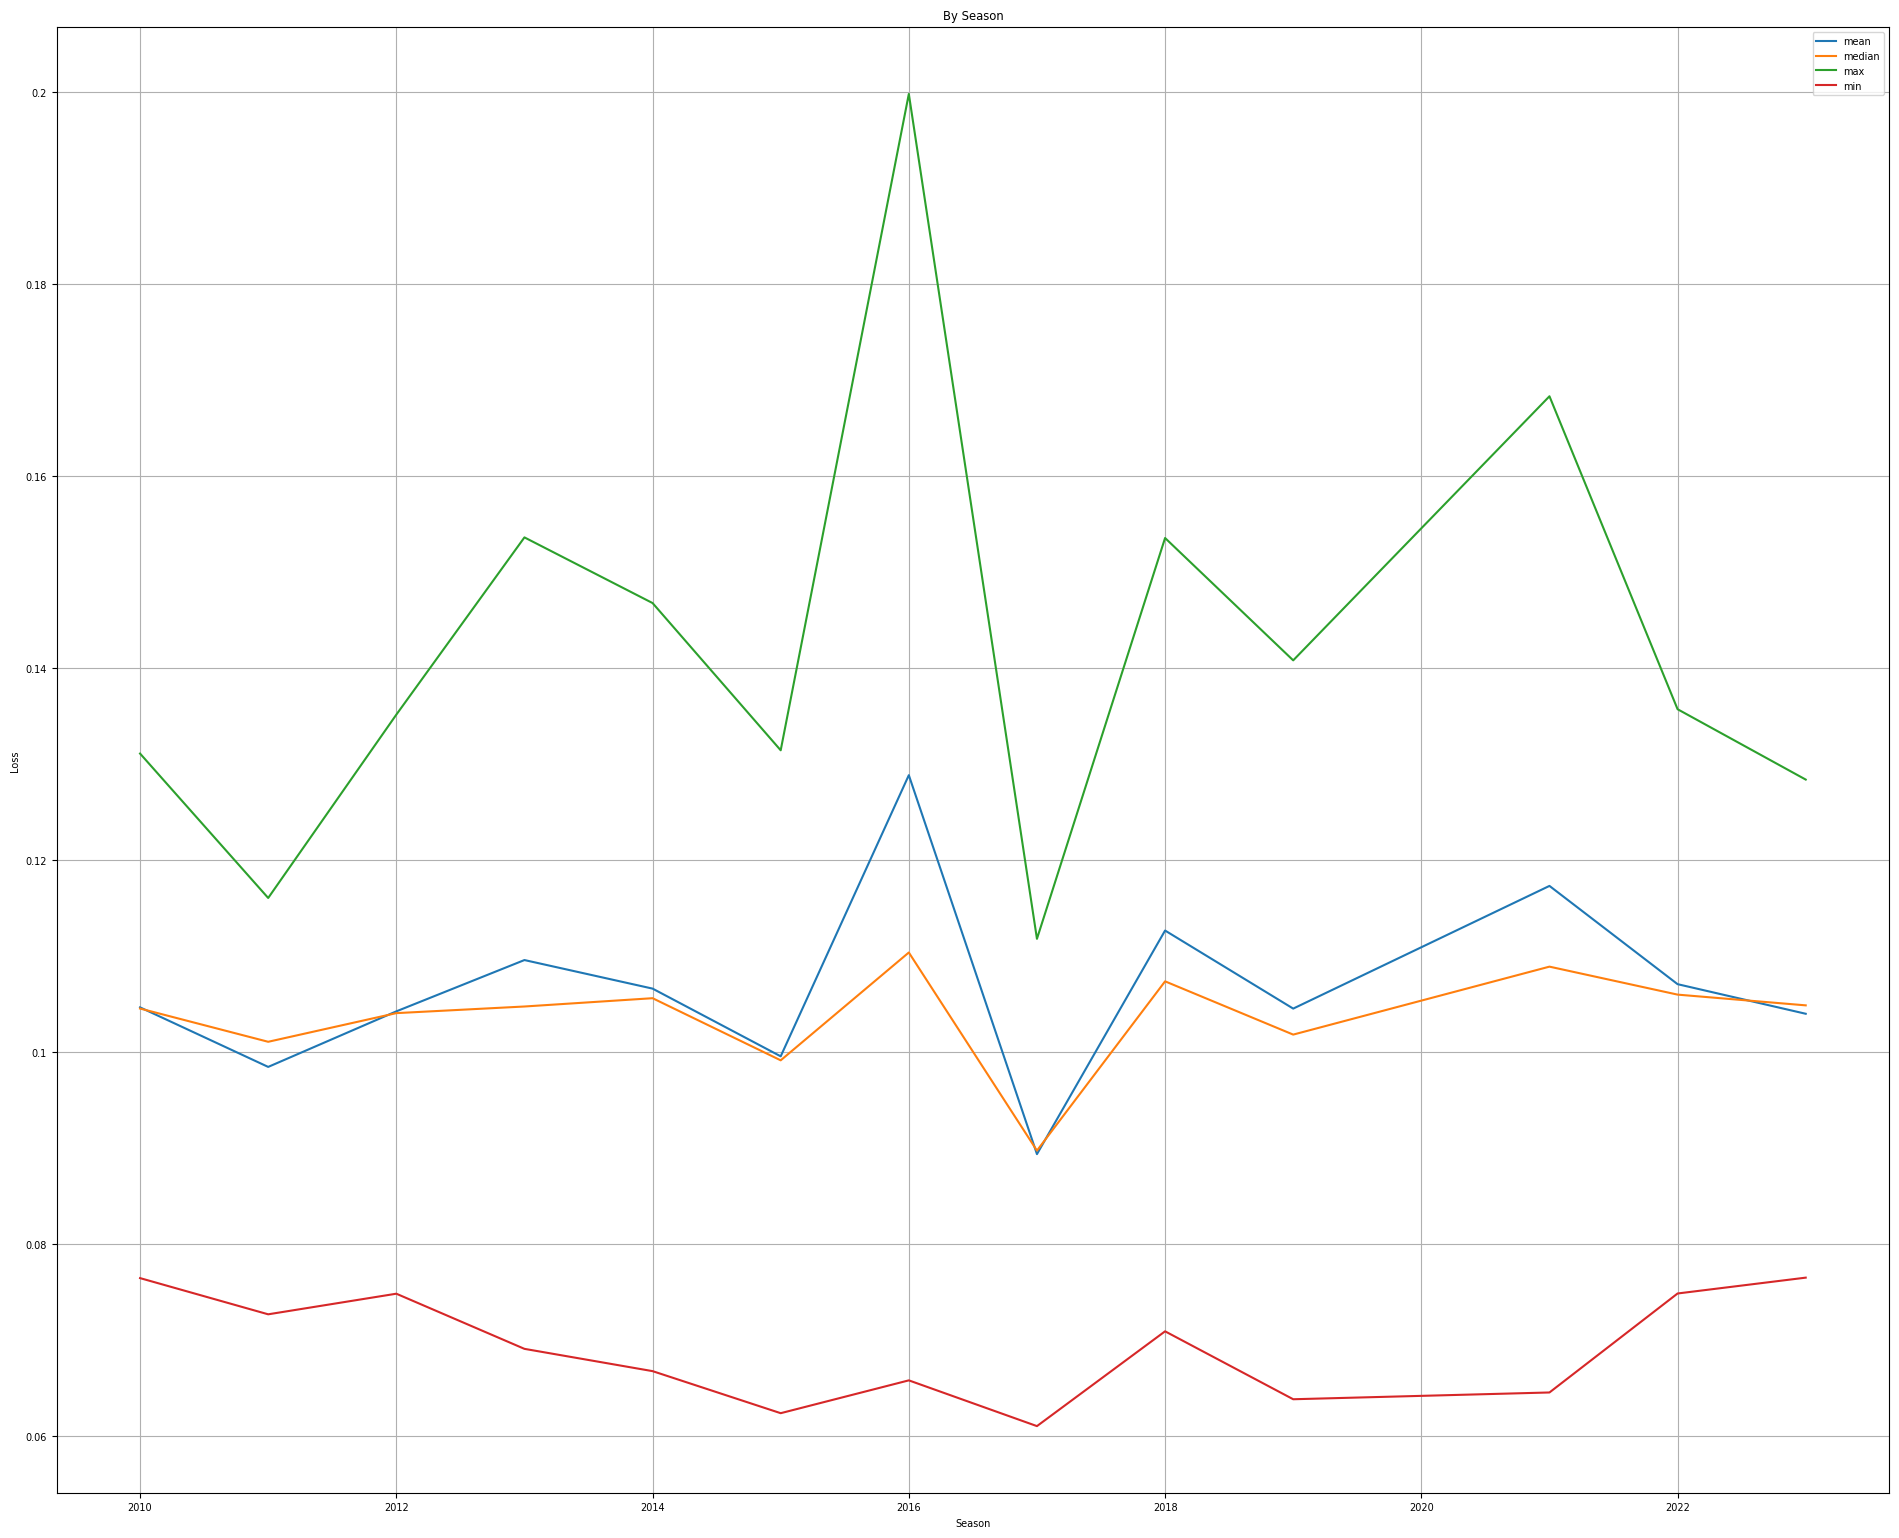

In [8]:
# Subplots
fig, ax = plt.subplots(1,1)
axes = axes.flatten()

# Resize to accomodate more figures
matplotlib.rcParams['figure.figsize'] = (19,15.4)

stats = ['mean', 'median', 'max', 'min']
years = list(range(2003,2023))

stats_df = df.groupby(by="season").tournament_loss.agg(stats)

for ix, stat in enumerate(stats):
    
    ax.plot(stats_df[stat].sort_index(), label=stat)
        
#     plt.draw()

ax.set_title("By Season")

ax.set_xlabel("Season")
ax.set_ylabel("Loss")

#     ax.xaxis.set_major_formatter(INT_FORMATTER)
ax.yaxis.set_major_formatter(INT_FORMATTER)

#     # Only show some tick labels
# xticks = list(ax.get_xticks())
# xlabels = list(ax.get_xticklabels())
# n = 2
# ax.set_xticks(xticks[::n])
# ax.set_xticklabels(xlabels[::n])
#     ax2.set_xticks(xticks[::n])
#     ax2.set_xticklabels(xlabels[::n])

#     ax.tick_params(axis='x', rotation=45)

#     # Now plot on secondary axis
#     ax2.plot(df["death_rate"], alpha=0.4, c='g', linestyle='dashed', label='death_rate')
#     ax2.plot(df["recovered_rate"], alpha=0.4, c='r', linestyle='dashed', label='recovered_rate')

# Show grid on major axis
ax.grid()

#     # Show secondary legend
#     if ix == 1:
#         ax2.legend(loc=0)

ax.legend(loc=0)

# # Get rid of x labels if chart in upper area
# if ix < 2:
#     ax.set_xticklabels([])
# #         ax2.set_xticklabels([])
#     ax.set_xlabel("")

#     # Show horizontal line
#     ax2.axhline(y=0.01, c='black', alpha = 0.9)

#     # Set axes limits
#     ax2.set_ylim(0,0.05)

# Add spacing between subplots to show axes more clearly
plt.tight_layout()



In [9]:
season_to_average = df.groupby(by=['season'])['tournament_loss'].mean().to_dict()

In [10]:
season_to_average

{2010: 0.10460263925980184,
 2011: 0.09839854673055422,
 2012: 0.10418524638695385,
 2013: 0.10953001739914843,
 2014: 0.10655505205709033,
 2015: 0.0995011233873017,
 2016: 0.1287884673137704,
 2017: 0.08931292981769536,
 2018: 0.1126041200135248,
 2019: 0.10447286081794256,
 2021: 0.11725353615777041,
 2022: 0.10701747911755598,
 2023: 0.10393495936072271}

In [11]:
# Get evaluations into a df for analysis

df = sqlite_to_df('SELECT * from evaluations').dropna()

In [12]:
df['base'] = df['season'].map(season_to_average)

In [13]:
df['performance'] = df['base'] - df['tournament_loss']

In [14]:
df['performance**2'] = df['performance'].apply(lambda x: 0 if x < 0 else x**2)

In [15]:
df.tail()

,id,rating,d,k,seed,link,FGP,R,FGP3,season,tournament_loss,correct_predictions,base,performance,performance**2
6274,1_25_-5_B_2500_400_10_2022_500_600_0.16216,1.0,600.0,25,-5.0,B,2500.0,400.0,10.0,2022,0.110604,500.0,0.107017,-0.003586,0.0
6275,1_25_-5_B_2500_400_10_2022_1000_600_0.45132,1.0,600.0,25,-5.0,B,2500.0,400.0,10.0,2022,0.111161,1000.0,0.107017,-0.004144,0.0
6276,1_25_-5_B_2500_400_10_2023_100_600_0.05205,1.0,600.0,25,-5.0,B,2500.0,400.0,10.0,2023,0.116034,100.0,0.103935,-0.012099,0.0
6277,1_25_-5_B_2500_400_10_2023_500_600_0.97430,1.0,600.0,25,-5.0,B,2500.0,400.0,10.0,2023,0.114306,500.0,0.103935,-0.010371,0.0
6278,1_25_-5_B_2500_400_10_2023_1000_600_0.37771,1.0,600.0,25,-5.0,B,2500.0,400.0,10.0,2023,0.113818,1000.0,0.103935,-0.009883,0.0


In [16]:
df.groupby(by=params).agg({"performance**2":"mean"}).sort_values(
    by="performance**2", ascending=False).head(50)

performance**2
k  seed link FGP    R     FGP3   rating                
25 -5.0 N    5000.0 20.0  0.0    5.0           0.001253
             2500.0 20.0  10.0   5.0           0.001252
             5000.0 20.0  10.0   5.0           0.001239
             2500.0 20.0  0.0    5.0           0.001222
                          1000.0 5.0           0.001218
             5000.0 20.0  1000.0 5.0           0.001205
             1200.0 20.0  1000.0 5.0           0.001183
                          10.0   5.0           0.001161
                          0.0    5.0           0.001144
             2500.0 20.0  5000.0 5.0           0.001035
             1200.0 20.0  5000.0 5.0           0.001012
             5000.0 20.0  5000.0 5.0           0.000979
                    100.0 10.0   5.0           0.000746
                          1000.0 5.0           0.000738
             2500.0 100.0 0.0    5.0           0.000718
                          1000.0 5.0           0.000717
             1200.0 100.0 1000.0 5.0           0.000704
             5000.0 100.0 0.0    5.0           0.000701
             2500.0 100.0 10.0   5.0           0.000698
             1200.0 100.0 0.0    5.0           0.000685
                          10.0   5.0           0.000665
                          5000.0 5.0           0.000655
             2500.0 100.0 5000.0 5.0           0.000652
             5000.0 100.0 5000.0 5.0           0.000598
                    20.0  1000.0 1.0           0.000303
                          10.0   1.0           0.000297
                          0.0    1.0           0.000297
             2500.0 20.0  1000.0 1.0           0.000287
                          5000.0 1.0           0.000273
             5000.0 20.0  5000.0 1.0           0.000271
             2500.0 20.0  0.0    1.0           0.000255
                          10.0   1.0           0.000249
             1200.0 20.0  5000.0 1.0           0.000248
                          1000.0 1.0           0.000232
                          0.0    1.0           0.000226
                          10.0   1.0           0.000207
             5000.0 20.0  1000.0 0.3           0.000200
                          0.0    0.3           0.000186
                          10.0   0.3           0.000184
             2500.0 20.0  5000.0 0.3           0.000181
             5000.0 20.0  5000.0 0.3           0.000174
             2500.0 20.0  1000.0 0.3           0.000164
                          0.0    0.3           0.000151
             1200.0 20.0  5000.0 0.3           0.000146
             2500.0 20.0  10.0   0.3           0.000141
             1200.0 20.0  1000.0 0.3           0.000135
        B    1200.0 100.0 5000.0 5.0           0.000130
        N    1200.0 20.0  10.0   0.3           0.000112
                          0.0    0.3           0.000111
        B    2500.0 100.0 10.0   5.0           0.000110

In [17]:
df.groupby(by=params).agg({"tournament_loss":"mean"}).sort_values(
    by="tournament_loss", ascending=True).head(50)

tournament_loss
k  seed link FGP    R     FGP3   rating                 
25 -5.0 N    2500.0 20.0  10.0   5.0            0.073099
                          0.0    5.0            0.073368
             5000.0 20.0  0.0    5.0            0.073501
             2500.0 20.0  1000.0 5.0            0.073756
             5000.0 20.0  10.0   5.0            0.073820
             1200.0 20.0  1000.0 5.0            0.073901
                          10.0   5.0            0.074033
             5000.0 20.0  1000.0 5.0            0.074157
             1200.0 20.0  0.0    5.0            0.074287
                          5000.0 5.0            0.077755
             2500.0 20.0  5000.0 5.0            0.078075
             5000.0 100.0 10.0   5.0            0.079656
                          1000.0 5.0            0.079857
             2500.0 100.0 0.0    5.0            0.079953
                          1000.0 5.0            0.080057
             1200.0 100.0 1000.0 5.0            0.080199
             5000.0 20.0  5000.0 5.0            0.080343
             2500.0 100.0 10.0   5.0            0.080385
             5000.0 100.0 0.0    5.0            0.080457
             1200.0 100.0 0.0    5.0            0.080570
                          10.0   5.0            0.080978
                          5000.0 5.0            0.081546
             2500.0 100.0 5000.0 5.0            0.081735
             5000.0 100.0 5000.0 5.0            0.083316
                    20.0  10.0   1.0            0.092441
             2500.0 20.0  1000.0 1.0            0.092557
             5000.0 20.0  0.0    1.0            0.092611
             2500.0 20.0  10.0   1.0            0.092952
                          0.0    1.0            0.093027
             5000.0 20.0  1000.0 1.0            0.093149
             1200.0 20.0  1000.0 1.0            0.093671
                          0.0    1.0            0.093774
                          10.0   1.0            0.094097
                          5000.0 1.0            0.096199
             2500.0 20.0  5000.0 1.0            0.096320
             5000.0 20.0  0.0    0.3            0.096460
                          10.0   0.3            0.096614
                          1000.0 0.3            0.096787
             2500.0 20.0  1000.0 0.3            0.096975
                          0.0    0.3            0.097097
             1200.0 20.0  1000.0 0.3            0.097631
             2500.0 20.0  10.0   0.3            0.097721
             5000.0 20.0  5000.0 1.0            0.098171
             1200.0 20.0  0.0    0.3            0.098269
             5000.0 100.0 1000.0 1.0            0.098333
             2500.0 100.0 0.0    1.0            0.098518
             5000.0 100.0 10.0   1.0            0.098554
             1200.0 20.0  10.0   0.3            0.098579
             2500.0 100.0 10.0   1.0            0.098811
             5000.0 100.0 0.0    1.0            0.098820

In [18]:
df.groupby(by=params).agg({"tournament_loss":"median"}).sort_values(
    by="tournament_loss", ascending=True).head(100)

tournament_loss
k  seed link FGP    R     FGP3   rating                 
25 -5.0 N    5000.0 20.0  10.0   5.0            0.071545
                          0.0    5.0            0.071724
                          1000.0 5.0            0.072245
             2500.0 20.0  10.0   5.0            0.072566
                          0.0    5.0            0.072761
                          1000.0 5.0            0.072946
             1200.0 20.0  1000.0 5.0            0.073022
                          0.0    5.0            0.074123
                          10.0   5.0            0.074454
                          5000.0 5.0            0.076174
             2500.0 20.0  5000.0 5.0            0.076569
                    100.0 0.0    5.0            0.077884
             5000.0 20.0  5000.0 5.0            0.078195
             2500.0 100.0 10.0   5.0            0.078606
             1200.0 100.0 0.0    5.0            0.078658
                          1000.0 5.0            0.078820
                          10.0   5.0            0.078974
             2500.0 100.0 1000.0 5.0            0.079099
             5000.0 100.0 1000.0 5.0            0.079286
                          10.0   5.0            0.079300
             1200.0 100.0 5000.0 5.0            0.079972
             5000.0 100.0 0.0    5.0            0.080133
             2500.0 100.0 5000.0 5.0            0.080891
             5000.0 100.0 5000.0 5.0            0.082364
             2500.0 20.0  1000.0 1.0            0.091721
             5000.0 20.0  0.0    1.0            0.092985
                          1000.0 1.0            0.093120
                          10.0   1.0            0.093505
             2500.0 20.0  0.0    1.0            0.093639
                          10.0   1.0            0.093654
             1200.0 20.0  0.0    1.0            0.094093
                          1000.0 1.0            0.094508
                          10.0   1.0            0.094734
                          5000.0 1.0            0.095173
             2500.0 20.0  5000.0 1.0            0.095645
             5000.0 20.0  0.0    0.3            0.095762
                          5000.0 1.0            0.095771
             2500.0 100.0 1000.0 1.0            0.095942
             1200.0 100.0 0.0    1.0            0.096058
             5000.0 100.0 10.0   1.0            0.096144
             2500.0 100.0 10.0   1.0            0.096153
                          5000.0 1.0            0.096261
             1200.0 100.0 5000.0 1.0            0.096561
             5000.0 20.0  1000.0 0.3            0.096654
             2500.0 20.0  1000.0 0.3            0.096839
                    100.0 0.0    1.0            0.097054
             5000.0 100.0 1000.0 1.0            0.097179
                          0.0    1.0            0.097191
             1200.0 100.0 10.0   1.0            0.097194
             5000.0 20.0  10.0   0.3            0.097226
             1200.0 20.0  1000.0 0.3            0.097719
             2500.0 20.0  0.0    0.3            0.097747
             1200.0 100.0 1000.0 1.0            0.097961
             2500.0 20.0  10.0   0.3            0.098065
             1200.0 20.0  10.0   0.3            0.098402
                          0.0    0.3            0.098456
        B    1200.0 100.0 5000.0 5.0            0.099259
        N    1200.0 100.0 1000.0 0.3            0.099401
             5000.0 100.0 10.0   0.3            0.099637
             1200.0 100.0 10.0   0.3            0.099698
             5000.0 100.0 5000.0 1.0            0.099801
             1200.0 100.0 5000.0 0.3            0.099900
             2500.0 100.0 5000.0 0.3            0.100053
             1200.0 100.0 0.0    0.3            0.100202
             5000.0 20.0  5000.0 0.3            0.100257
             2500.0 100.0 0.0    0.3            0.100354
                          1000.0 0.3            0.100601
        B    2500.0 100.0 10.0   5.0            0.100667
                          0.0    5.0            0.1

In [19]:
df.groupby(by=params).agg({"tournament_loss":"min"}).sort_values(
    by="tournament_loss", ascending=True).head(10)

tournament_loss
k  seed link FGP    R     FGP3   rating                 
25 -5.0 N    5000.0 100.0 10.0   5.0            0.060981
                          0.0    5.0            0.062197
                    20.0  1000.0 5.0            0.062328
             1200.0 100.0 10.0   5.0            0.062358
             5000.0 100.0 1000.0 5.0            0.063377
             2500.0 100.0 10.0   5.0            0.063506
                          0.0    5.0            0.063551
             1200.0 100.0 0.0    5.0            0.063598
             2500.0 100.0 1000.0 5.0            0.063717
                    20.0  10.0   5.0            0.063780

In [20]:
set(df['k'])

{25}